<a href="https://colab.research.google.com/github/DanielJacksonEdu/GEOG5302M-Programming-for-Data-Science/blob/main/Lab5/Lab5_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Week 5
## Clustering

## Setting Up

We've officially made it to half way through GEOG5302 labs! Last week, we combined everything from the first few labs to build regression models, which predicted house sale price from a range of building and local-area attributes.

In this session, we'll carry on directly from last week, using a fresh copy of the `HouseSales.csv` file we saved in the lab. This week will be a very similar format to last week's, but we'll work through a series of clustering techniques, which we just covered in the lecture: K-Means, DBSCAN, and Hierarchical. There'll also be an opportunity to work through some deep learning techniques at the end of the lab.

Start by loading packages and data we'll need.

__Note:__ Although we saved our own versions of the dataset last week, there is a fresh copy available in Minerva, which has been tested with this lab. You're recommended to use this version, just to ensure compatibility/consisitency of variable names.

In [3]:
import pandas as pd
import numpy as np #adding a numerical module
import matplotlib.pyplot as plt
import seaborn as sns #import seaborn for some fancier visualisations
import math #adding the maths module so we can do some calculations later
pd.options.mode.chained_assignment = None

## Getting Started

You've had lots of practice on this by now, so read in your HouseSales data below:

In [6]:
#Read in the sales data
sales = pd.read_csv('HouseSales.csv')

In [7]:
#view the top 10 rows of the data
sales.head(10)

,price_paid,deed_date,property_type,new_build,estate_type,city,county,Rank,Income,Employment,...,Housing,Environment,new_build_bin,freehold_bin,type_semi,type_detached,type_flat,type_other,type_terrace,price_high
0,10000,06/05/2021,O,N,L,LONDON,GREATER LONDON,65,56,78,...,4,16,0,0,0,0,0,1,0,0
1,13000,13/05/2021,O,N,F,BRACKNELL,BRACKNELL FOREST,107,108,106,...,14,104,0,1,0,0,0,1,0,0
2,14000,28/05/2021,O,N,F,WORTHING,WEST SUSSEX,92,104,90,...,109,42,0,1,0,0,0,1,0,0
3,15000,21/05/2021,O,N,F,LONDON,GREATER LONDON,65,56,78,...,4,16,0,1,0,0,0,1,0,0
4,15000,25/05/2021,O,N,L,NEWCASTLE UPON TYNE,TYNE AND WEAR,37,35,36,...,51,89,0,0,0,0,0,1,0,0
5,18000,11/05/2021,O,N,F,LONDON,GREATER LONDON,65,56,78,...,4,16,0,1,0,0,0,1,0,0
6,18000,07/05/2021,O,N,F,NEWCASTLE UPON TYNE,TYNE AND WEAR,37,35,36,...,51,89,0,1,0,0,0,1,0,0
7,18271,03/05/2021,O,N,L,LONDON,GREATER LONDON,65,56,78,...,4,16,0,0,0,0,0,1,0,0
8,19000,13/05/2021,O,N,F,GUILDFORD,SURREY,101,98,107,...,56,81,0,1,0,0,0,1,0,0
9,20000,04/05/2021,O,N,L,LONDON,GREATER LONDON,65,56,78,...,4,16,0,0,0,0,0,1,0,0


To refresh your memory of the dataset from last week, `describe` the data:

In [8]:
#describe the data
sales.describe()

,price_paid,Rank,Income,Employment,Health,Education,Crime,Housing,Environment,new_build_bin,freehold_bin,type_semi,type_detached,type_flat,type_other,type_terrace,price_high
count,7456.000000,7456.000000,7456.000000,7456.000000,7456.000000,7456.000000,7456.000000,7456.000000,7456.000000,7456.000000,7456.000000,7456.000000,7456.000000,7456.000000,7456.000000,7456.000000,7456.000000
mean,275719.427843,49.369367,48.966470,52.462312,51.543053,55.349115,43.428648,46.485783,42.689244,0.003621,0.752146,0.295333,0.177843,0.171003,0.028433,0.327387,0.381572
std,177701.614201,29.142764,28.227056,28.383324,30.822806,32.291131,29.251457,32.713902,30.763988,0.060072,0.431796,0.456223,0.382406,0.376537,0.166219,0.469291,0.485805
min,10000.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,150000.000000,23.000000,26.000000,30.000000,24.000000,25.000000,19.000000,14.000000,16.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,230000.000000,50.000000,51.000000,52.000000,49.000000,53.000000,39.000000,43.000000,34.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,350000.000000,69.000000,68.000000,78.000000,82.000000,83.000000,65.000000,74.000000,69.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,995000.000000,109.000000,109.000000,109.000000,109.000000,109.000000,109.000000,109.000000,109.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


The first step, as usual, is some exploration of the data. Clustering helps to find natural groups in our data, revealing structure within our data points. It also helps tell us which attributes are best for differentiating between groups, and identify those which are not useful for taking forward to later analyses.

In this tutorial, we will work through the use of one clustering approach, and then you'll try out two more. The `scikit-learn` package makes production of multiple models very simple, so once you've run one model, the rest should be relatively straight forward. Similarly to last week, each modelling technique takes different arguments, but the same essential approach is used every time.


Again this week, we'll work with a subset of the data. Create a subset to help us decide which variables we want to start clustering on. Create your subset with the variables for: price, income, health, education, crime, housing, environment, property type, and the binary variables you created for new build and freehold.

In [9]:
#create your subset
sales_sub1 = sales[['price_paid','Income', 'Health', 'Education', 'Crime', 'Housing', 'Environment', 'new_build_bin', 'freehold_bin']]

As we did last week, create a [scatter matrix](https://seaborn.pydata.org/examples/scatterplot_matrix.html) of your subset:

In [10]:
output = pd.plotting.scatter_matrix #plot the scatter matrix

Another, similar tool, is a [pairplot](https://seaborn.pydata.org/generated/seaborn.pairplot.html), which also plots the lines of best fit for OLS regression, for each pair:

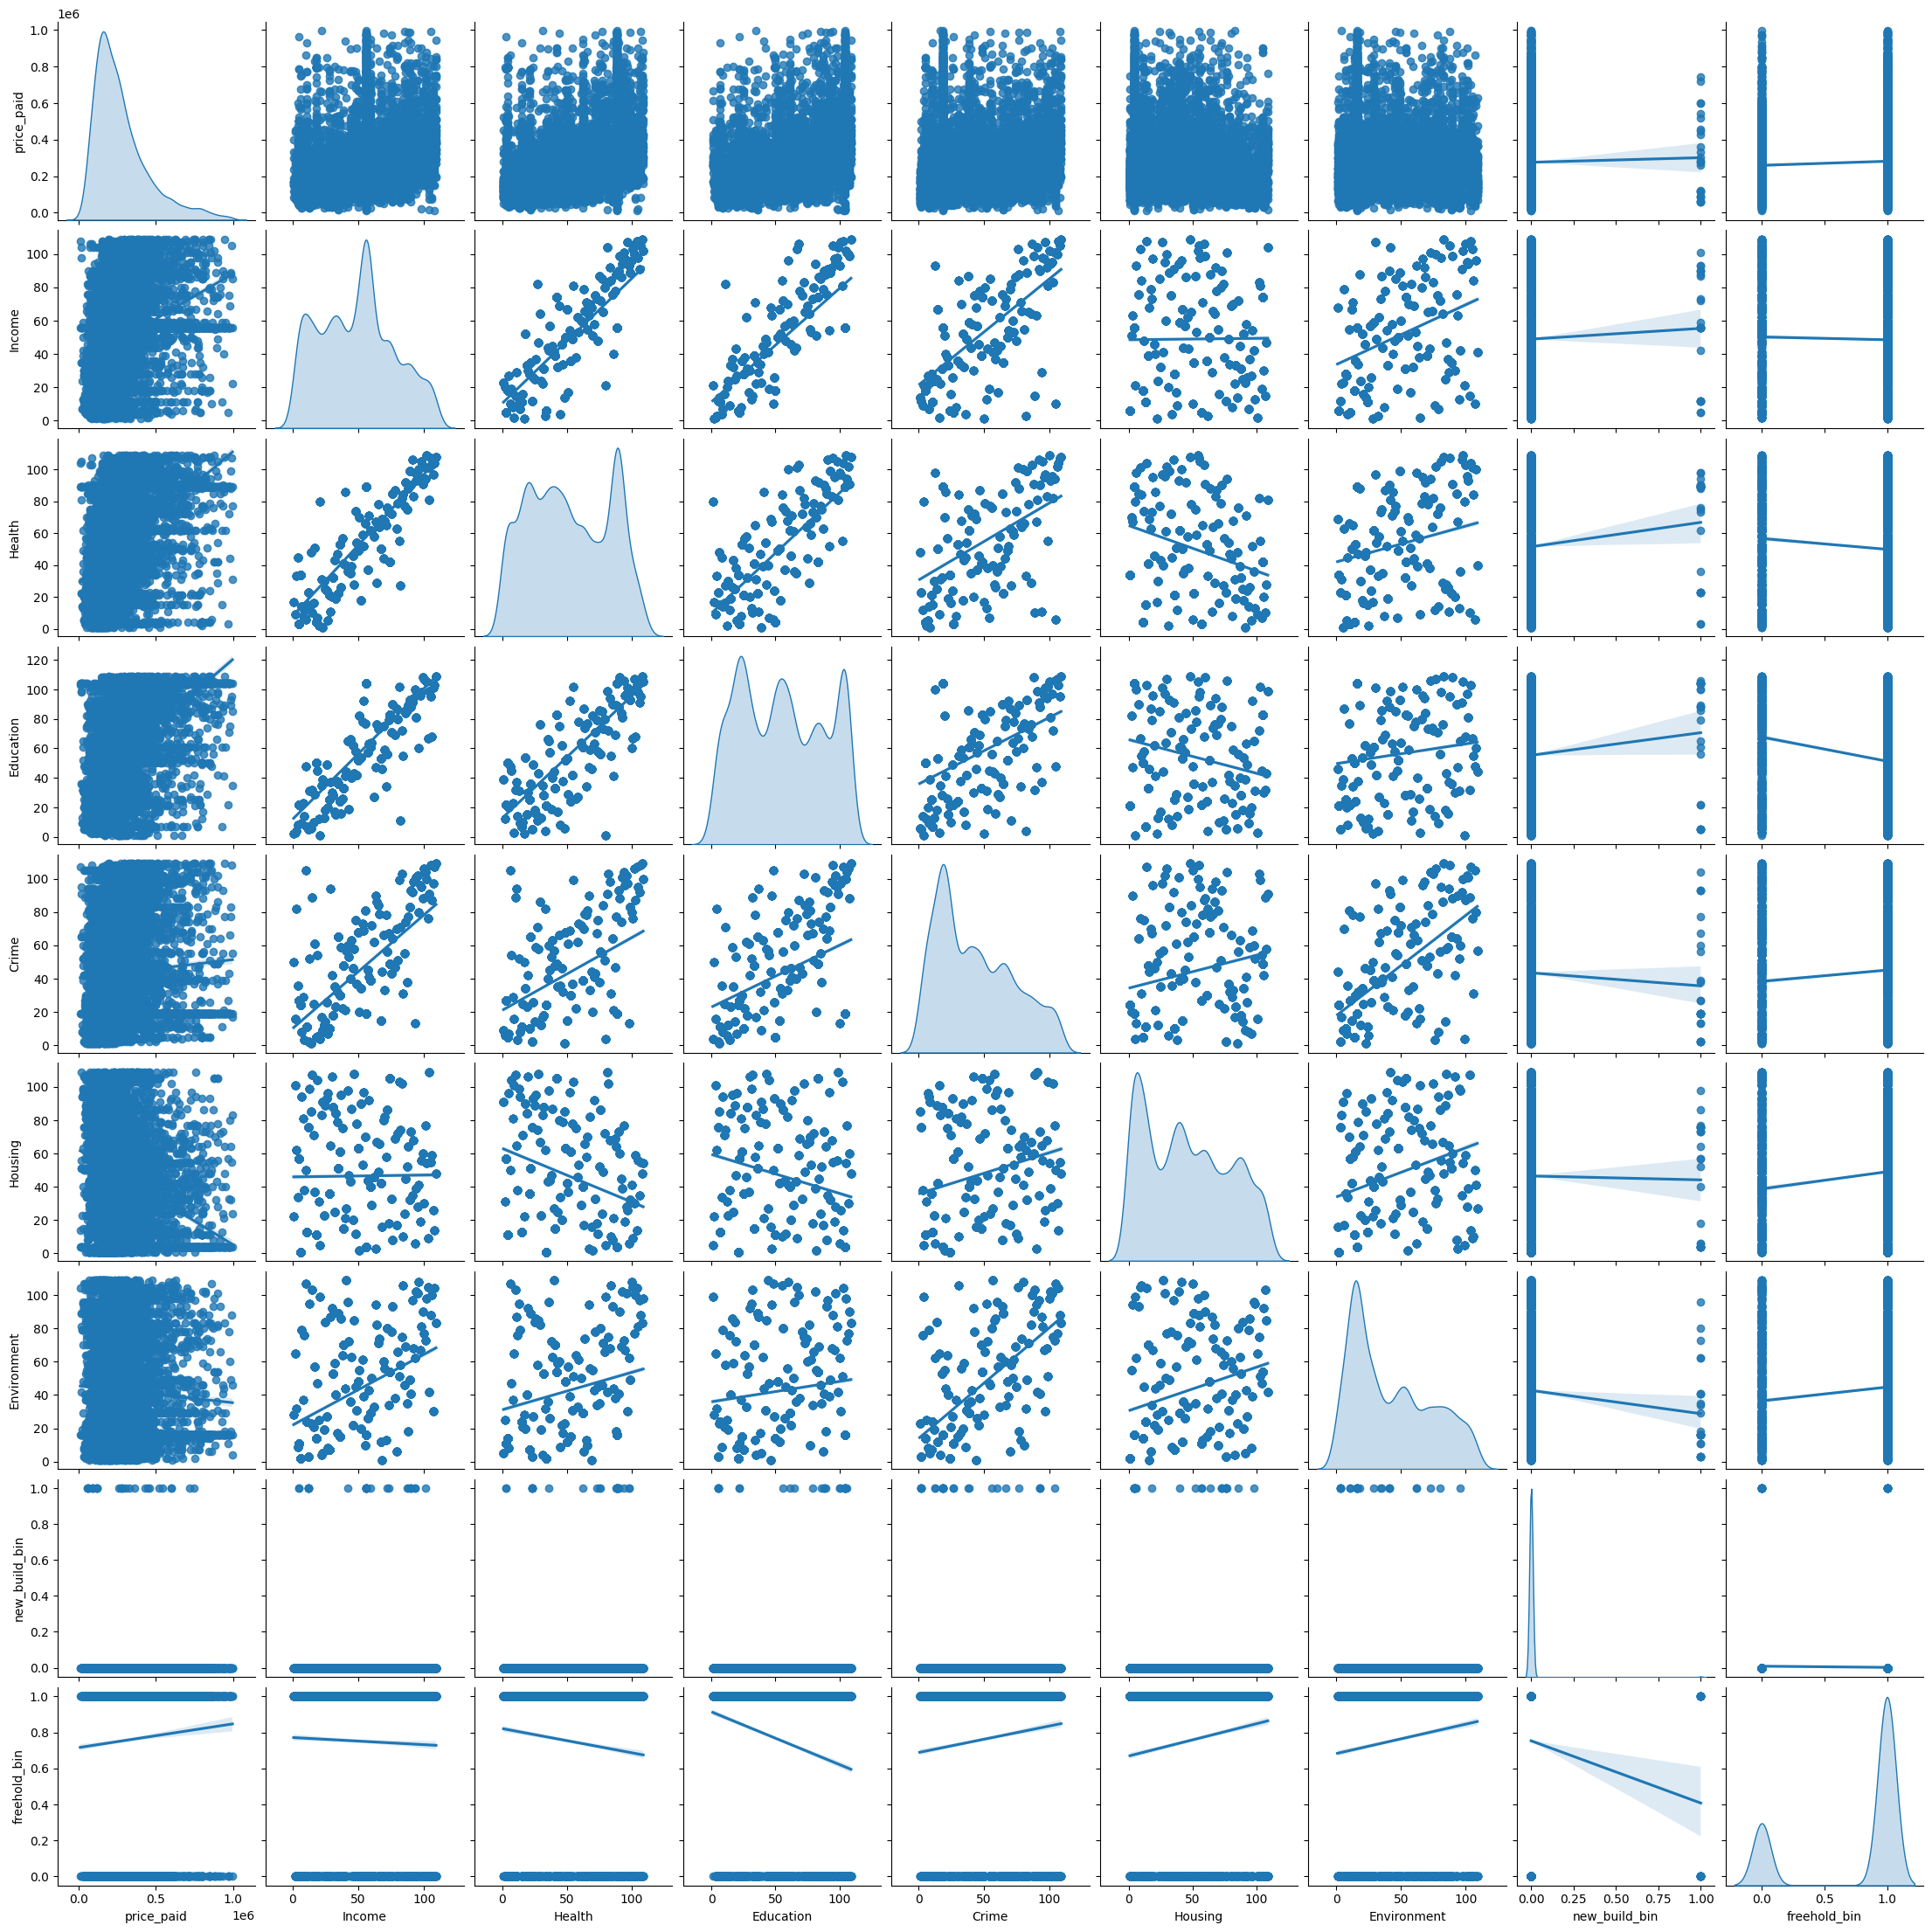

In [11]:
output = sns.pairplot(sales_sub1, kind='reg', diag_kind='kde')

Before we start on clustering, we'll create a dataset with just the variables we want to include. We'll start simple, this time working with the local area variable of Housing (as this is our focus for these couple of labs) and Health deprivation. We'll add in more of the house-level variables later.

In [12]:
#create your subset here
sales_sub = sales[['Housing', 'Health']]
sales_sub.head()

,Housing,Health
0,4,89
1,14,104
2,109,81
3,4,89
4,51,22


Although we can see the distribution of these variables in the graph above, make a larger scatter plot of health and housing deprivation below. __Hint:__ Have a look back at Lab 3, or [this tutorial](https://seaborn.pydata.org/generated/seaborn.relplot.html) if you need a refresher on how to do a scatter plot.

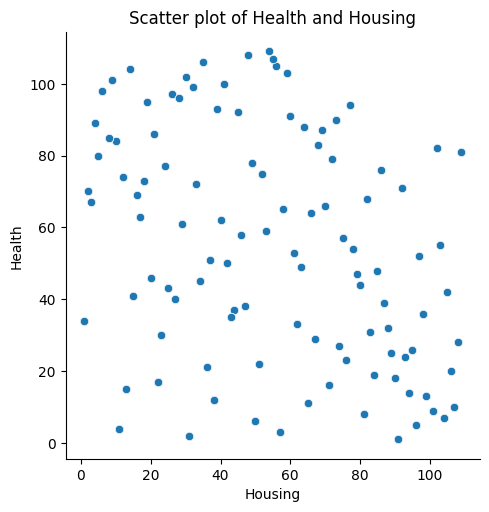

In [13]:
#scatter plot of health and housing deprivation
fig = sns.relplot(data=sales_sub, x='Housing', y='Health')
plt.title('Scatter plot of Health and Housing')
plt.show()

And finally, create vertical box plots of both of these variables, to visualise the distributions. Plot these next to each other on the same image, if you can.
__Hint:__ (read [this](https://www.tutorialspoint.com/how-to-make-two-plots-side-by-side-using-python) if you need a refresher on how to do this!)

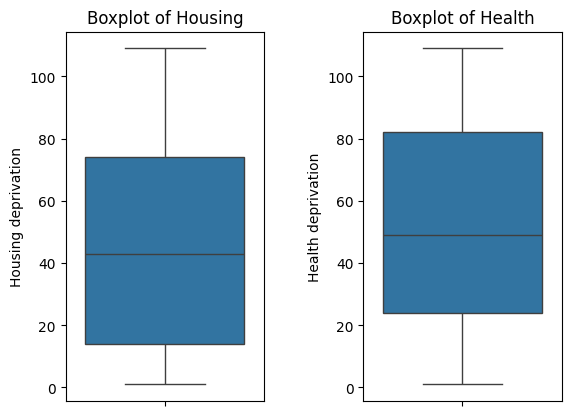

In [14]:
#create two box plots
plt.subplot(1, 2, 1) # row 1, col 2 index 1
sns.boxplot(data=sales_sub, y= 'Housing')
plt.title("Boxplot of Housing")
plt.ylabel('Housing deprivation')

plt.subplot(1, 2, 2) # index 2
sns.boxplot(data=sales_sub, y='Health')
plt.title("Boxplot of Health")
plt.ylabel('Health deprivation')

plt.subplots_adjust(wspace=0.5)
plt.show()

<br><br><br>
## K- Means

Now we can get stuck into some clustering. We'll start with K-Means, which is the most straightforward, dividing up our data into _K_ groups, based on the variables we provide. We can play around with the number of _K_ to optimise our model. Read more on _K_ means in Python [here](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html#sklearn.cluster.KMeans). We'll import the packages we'll need for this section:

In [15]:
from sklearn.cluster import KMeans
import sklearn.metrics as metrics

As we saw in the lecture, there are different ways of deciding how many clusters we should use. One of the simplest approaches is to take the square root of the number of data points. We can find out how many data points we have by either calling `info` or `len()`, which will tell us the length of the data set.

In [16]:
len(sales_sub)

7456

We can then input the length into the square root command:

In [17]:
math.sqrt(7456)

86.34813257969161

A quicker way of doing this is to combine them into one line of code:

In [18]:
math.sqrt(len(sales_sub))

86.34813257969161

As you can see, this method is suggesting that we should use 86 clusters, which sounds like quite a lot! It may also be quite difficult to visualise- imagine trying to plot a graph where there are 86 different colours, one for each group!

We'll also try the 'elbow' method, which quickly tries out lots of different options for the number of clusters, and helps us find the one where the distortion drops. By this, we mean the point at which we have a good balance between distortion (errors) and the number of clusters.

The code below is a little more complex than some of the code we've run so far- it combines several commands into a [for loop](https://www.digitalocean.com/community/tutorials/python-for-loop-example). You might have come across these in your Programming module. We start by creating an empty list where we will save the distortion values. We then decide how many values of K (the number of clusters) we want to try. Then, we start our loop. For each value (k) in the list (K), Python will calculate a K-Means clustering model. It then fits the model, calculates the distortion (Python calls this 'inertia'), and adds this to the list of distortions. The loop then repeats this K times, until it has gone through all the numbers in the list.

In [19]:
distortions = [] #create an empty list for our distortion data
K = range(1,10) #the range of K values for the number of clusters we want to try
for k in K: #for each value in K
    kmeanModel = KMeans(n_clusters=k) #build a K-Means clustering model
    kmeanModel.fit(sales_sub) #fit the model to our sales_sub data
    distortions.append(kmeanModel.inertia_) #add the results to our list of distortions

We can now plot the distortions against the number of clusters (_K_) and find the best value:

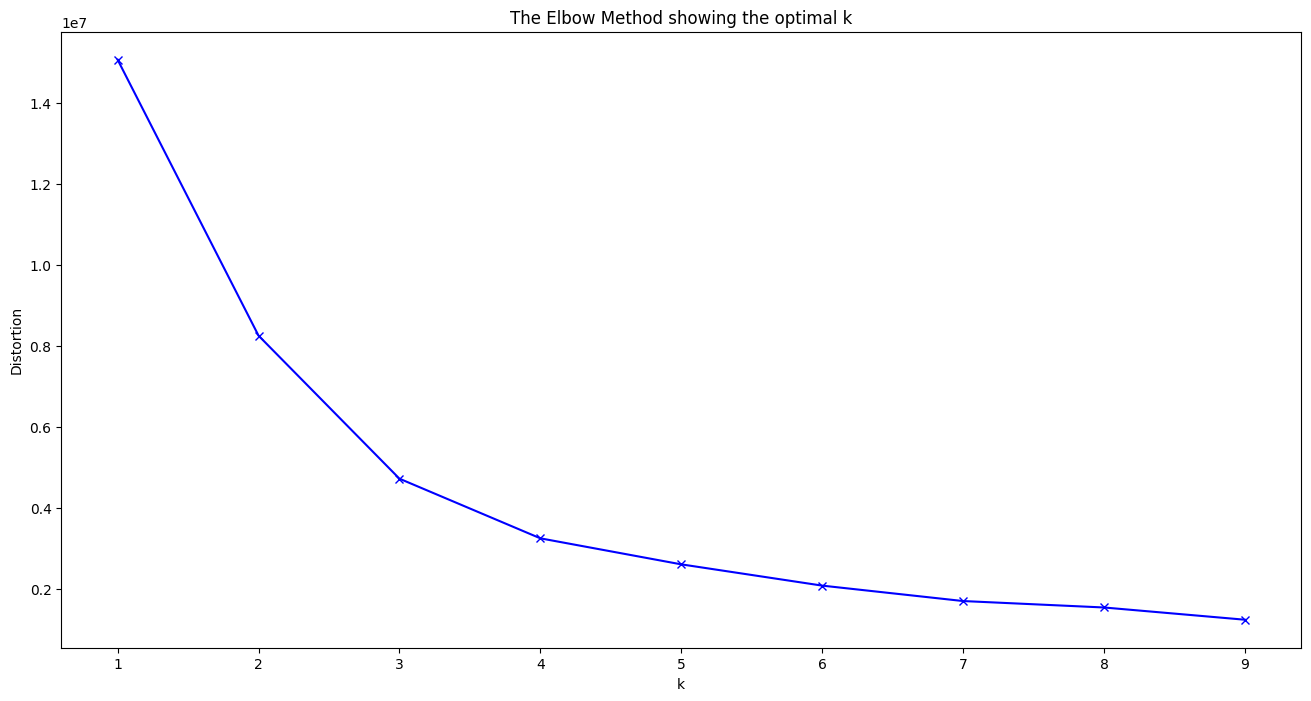

In [20]:
plt.figure(figsize=(16,8))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

From the plot above, it looks like there is a big drop between 1 and 3, so we'll use 3 clusters to calculate our K-Means model, as this sounds a lot easier than our initial estimate of 86! We're finally ready to get going!

Similarly to last week, we create our K-means object, and provide our parameters (the number of clusters)- which we've just selected.

In [21]:
kmeans = KMeans(n_clusters=3)

Then we fit this model to our data:

In [22]:
kmeans.fit(sales_sub)

KMeans(n_clusters=3)

Now we've fitted our model, we can look at the clusters it has identified. We do this by looking at the labels, which tell us which group each data point has been assigned. We access this through the `.labels_` attribute:

In [23]:
kmeans.labels_

array([0, 0, 1, ..., 0, 1, 0], dtype=int32)

As we'll come back to this in the next few steps, we'll give it its own variable name. Assign these labels to the variable `kmeans_label`:

In [24]:
kmeans_labels = kmeans.labels_

We can test the fit of our cluster assignment with a Silhouette Score, which calculates how close points are on average to points they're clustered with, relative to points they are not clustered with.

We calculate this using just the data and the cluster labels we've generated. A score closer to one indicates strong clustering, negative scores indicate poor clustering (ie, the points are more similar to points in other clusters than those in this cluster- which is the opposite of what we want). The maximum value is 1, which means the clusters are perfectly separated, the minimum is -1, which means the points are completely dispersed, and there's no separation between groups.

In [25]:
metrics.silhouette_score(sales_sub,kmeans.labels_) #specify the data and the labels

0.45838930691294427

What does this value tell us?
_The value is positive, showing that the clusters have captured some groups in the data. The value is close to 0.5, so not really strong._

In order to identify which data points fall into which cluster, and plot this, we can add the `kmeans_labels` variable as a column in our data. Assign this below:

In [26]:
sales_sub['KClusters'] = kmeans_labels

And look at the top of data to inspect it. Note that there are three clusters, but these are labelled in the way Python likes to count: starting from 0.

In [27]:
#look at the top of the data
sales_sub.head()

,Housing,Health,KClusters
0,4,89,0
1,14,104,0
2,109,81,1
3,4,89,0
4,51,22,2


And count the values, to see how many points have been assigned to each cluster:

In [28]:
#count the values of the kClusters column
sales_sub['KClusters'].value_counts()

,count
KClusters,
0,2784
1,2449
2,2223


Now visualise the clusters and their variation with Health and Housing. You can use the `relplot()` code above as a starting point, and colour the points by their cluster. __Hint:__ Look at Lab 3 for notes on how to do this!

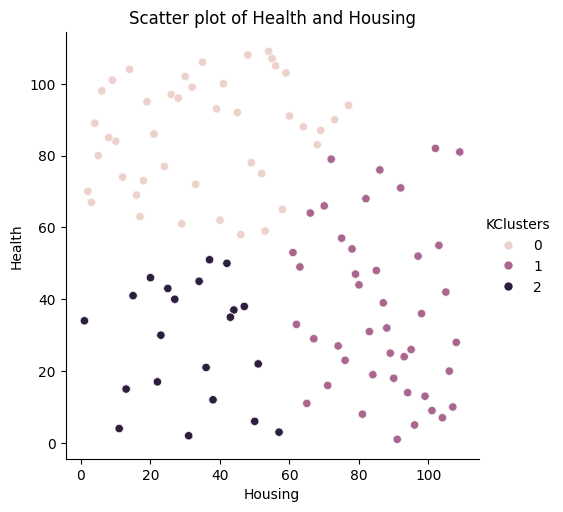

In [29]:
#scatter plot of health and housing deprivation, colour coded by cluster
fig = sns.relplot(data=sales_sub, x='Housing', y='Health', hue='KClusters')
plt.title('Scatter plot of Health and Housing')
plt.show()

What does this graph tell us? How is the _K_ means algorithm assigning the data points to the groups? Is it relying on one variable more than the other?

In [30]:
#comment on the results and the plot
#The graph tells us there are 3 clusters of data for health and housing, but this may be making clusters
#where there are none. The K means algorithm is assigning the data points to the groups based on where they are
# in relation to the centroid, which in this case is roughly in the middle of the data.


Now, rerun the model, trying out different numbers of clusters to see how the results change. When you increase or decrease the number of clusters, does the Silhouette Score go up or down? Remember to recreate your subsample before you run another clustering model, otherwise the clusters from last time will still be in your sales_sub data frame, and will distort your results!

0.47778038453712735


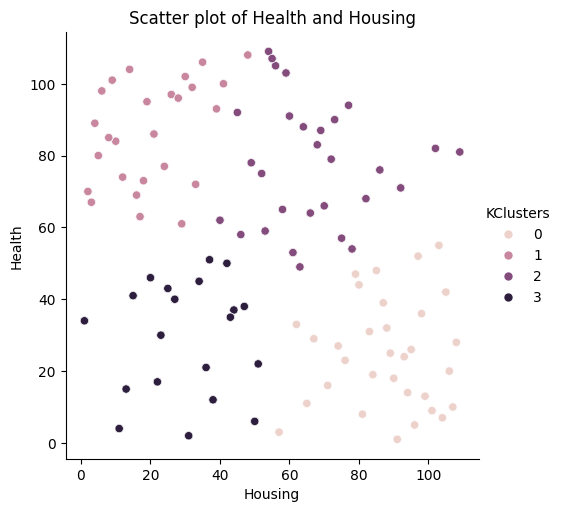

In [42]:
sales_sub = sales[['Housing', 'Health']]
kmeans = KMeans(n_clusters=4)
kmeans.fit(sales_sub)
kmeans_labels = kmeans.labels_
print(metrics.silhouette_score(sales_sub,kmeans.labels_)) #specify the data and the labels
sales_sub['KClusters'] = kmeans_labels
#scatter plot of health and housing deprivation, colour coded by cluster
fig = sns.relplot(data=sales_sub, x='Housing', y='Health', hue='KClusters')
plt.title('Scatter plot of Health and Housing')
plt.show()

Decreasing the number of clusters drastically decreases the silhouette score, whilst more clusters increases the silhouette score closer to 0.5.

<br><br><br>
## DBSCAN
The process for running DBSCAN is essentially the same as KMeans, although there are different paramters required for initialising the model. We start by importing the DBSCAN package.

In [43]:
from sklearn.cluster import DBSCAN

We also need to reset our subsample, or remove the column of K-Means clusters:

In [44]:
sales_sub = sales[['Health', 'Housing']]

We can now create our DBSCAN cluster object. `eps` is the threshold distance (how near points need to be to be included in the same cluster) and `min_samples` is the minimum cluster size (the smallest number of points we need to be able to call the collection of points a 'cluster'). We'll start with some arbitrary values, and you can play around with altering these after you've got the hang of the model.

In [45]:
dbscan = DBSCAN(eps=10, min_samples=40)

Now, here's your challenge. You should be able to calculate the DBSCAN model, find the cluster labels, get the Silhouette Score and plot the resulting clusters in the same way as above. We've outlined each step for you, so have a go below.

In [46]:
#fit the model
dbscan.fit(sales_sub)

DBSCAN(eps=10, min_samples=40)

In [47]:
#assign the labels to a new variable
dbscan_labels = dbscan.labels_

In [48]:
#view the labels
dbscan_labels

array([0, 0, 1, ..., 0, 5, 0])

In [49]:
#add the clusters as a new column and view the subsample:
sales_sub['dClusters'] = dbscan_labels

In [50]:
#calculate the Silhouette Score
metrics.silhouette_score(sales_sub,dbscan.labels_)

0.37718903528898234

How does the Silhouette score compare to the KMeans model, and what does this tell us about how the model fits?

In [51]:
#comment on the Silhouette Score
# The silhouette score is much smaller compared to the KMeans model, telling us that this model fits the data worse than the KMeans model

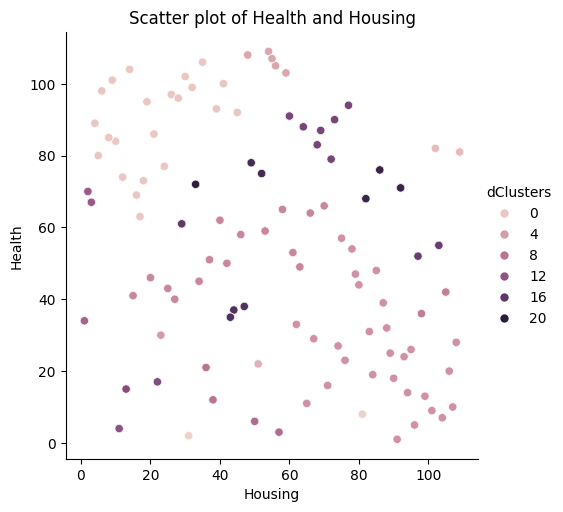

In [52]:
#plot the resulting clusters, colour coded on a Scatter graph
#scatter plot of health and housing deprivation, colour coded by cluster
fig = sns.relplot(data=sales_sub, x='Housing', y='Health', hue='dClusters')
plt.title('Scatter plot of Health and Housing')
plt.show()

So what do you think of the results? Do the clusters look useful or realistic? How do they compare to K-Means? __Note:__ Any points assigned to the cluster `-1` means they are outliers which don't fit in with any of the clusters.

The clusters do not look useful or realistic as they are spread all throughout the plot. The clusters are very different to k-means, which was grouping them all together. |

As before, rerun the model, trying out different intial parameters to see how the results change, and try to optimise the performance of the model. Take it in turns to change `eps` and `minsamples`.

0.9045617748411723


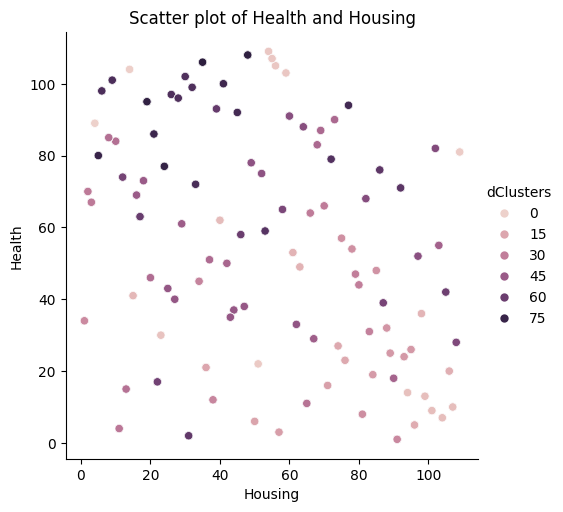

In [58]:
sales_sub = sales[['Housing', 'Health']]
dbscan = DBSCAN(eps=5, min_samples=10)
dbscan.fit(sales_sub)
dbscan_labels = dbscan.labels_
print(metrics.silhouette_score(sales_sub,dbscan.labels_)) #specify the data and the labels
sales_sub['dClusters'] = dbscan_labels
#scatter plot of health and housing deprivation, colour coded by cluster
fig = sns.relplot(data=sales_sub, x='Housing', y='Health', hue='dClusters')
plt.title('Scatter plot of Health and Housing')
plt.show()

<br><br><br>
## Hierarchical

Helpfully, Heirarchical Agglomerative Clustering is very similar, but again has different parameters. See [here](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.AgglomerativeClustering.html#sklearn.cluster.AgglomerativeClustering) for instructions on altering these. We'll start simple. As before, there's code to get you started, but then it's down to you!

In [59]:
#import the packages
from sklearn.cluster import AgglomerativeClustering

In [72]:
#reset the subsample, again
sales_sub = sales[['Health', 'Housing']]

In [61]:
#view the subsample to check it worked
sales_sub.head()

,Health,Housing
0,89,4
1,104,14
2,81,109
3,89,4
4,22,51


In [62]:
#create the hierarchical model, with intialised parameters.
#We'll start with the same number of clusters as we used for K-Means, so we can compare them
agg = AgglomerativeClustering(distance_threshold=None, n_clusters=3)

In [63]:
#fit the model
agg.fit(sales_sub)

AgglomerativeClustering(n_clusters=3)

In [64]:
#save the labels as a new variable
agg_labels = agg.labels_

In [65]:
#view the labels
agg_labels

array([1, 1, 0, ..., 1, 0, 1])

In [66]:
#add the clusters as a new column and view the subsample
sales_sub['hClusters'] = agg_labels

In [67]:
#calculate the silhouette score
metrics.silhouette_score(sales_sub,agg.labels_)

0.44312039786567753

In [68]:
#comment on the Silhouette Score
# The value is positive, so the model has captured some clusters within the data, but it is close to 0.5, so the
# clusters are not very strong. The score is similar to for KMeans, suggesting these models are working to similar degree.


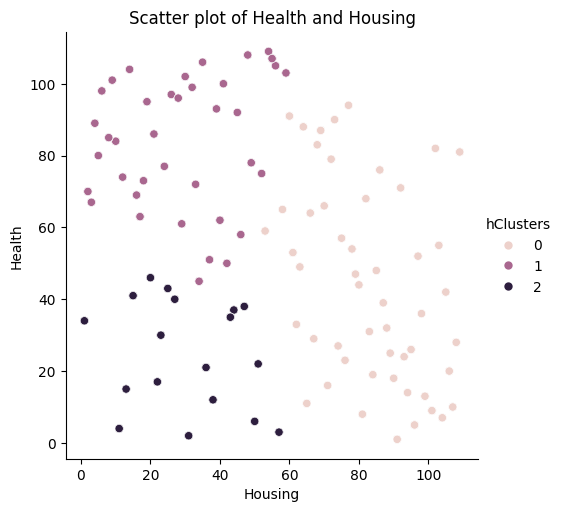

In [69]:
#plot the clusters on a scatter graph
#scatter plot of health and housing deprivation, colour coded by cluster
fig = sns.relplot(data=sales_sub, x='Housing', y='Health', hue='hClusters')
plt.title('Scatter plot of Health and Housing')
plt.show()

How does this graph compare to the K-Means plot?

In [70]:
#comment on the graph
# This graph is almost identical to the K-Means plot.

Now we're going to try and plot the dendodogram (at least the top of it!)

In [71]:
from scipy.cluster.hierarchy import dendrogram

In [73]:
#FIT the model Hierarchical model again and save it as model (using .fit())
model = agg.fit(sales_sub)

In [74]:
def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    distance = np.arange(model.children_.shape[0])

    linkage_matrix = np.column_stack(
        [model.children_, distance, counts]
    ).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)


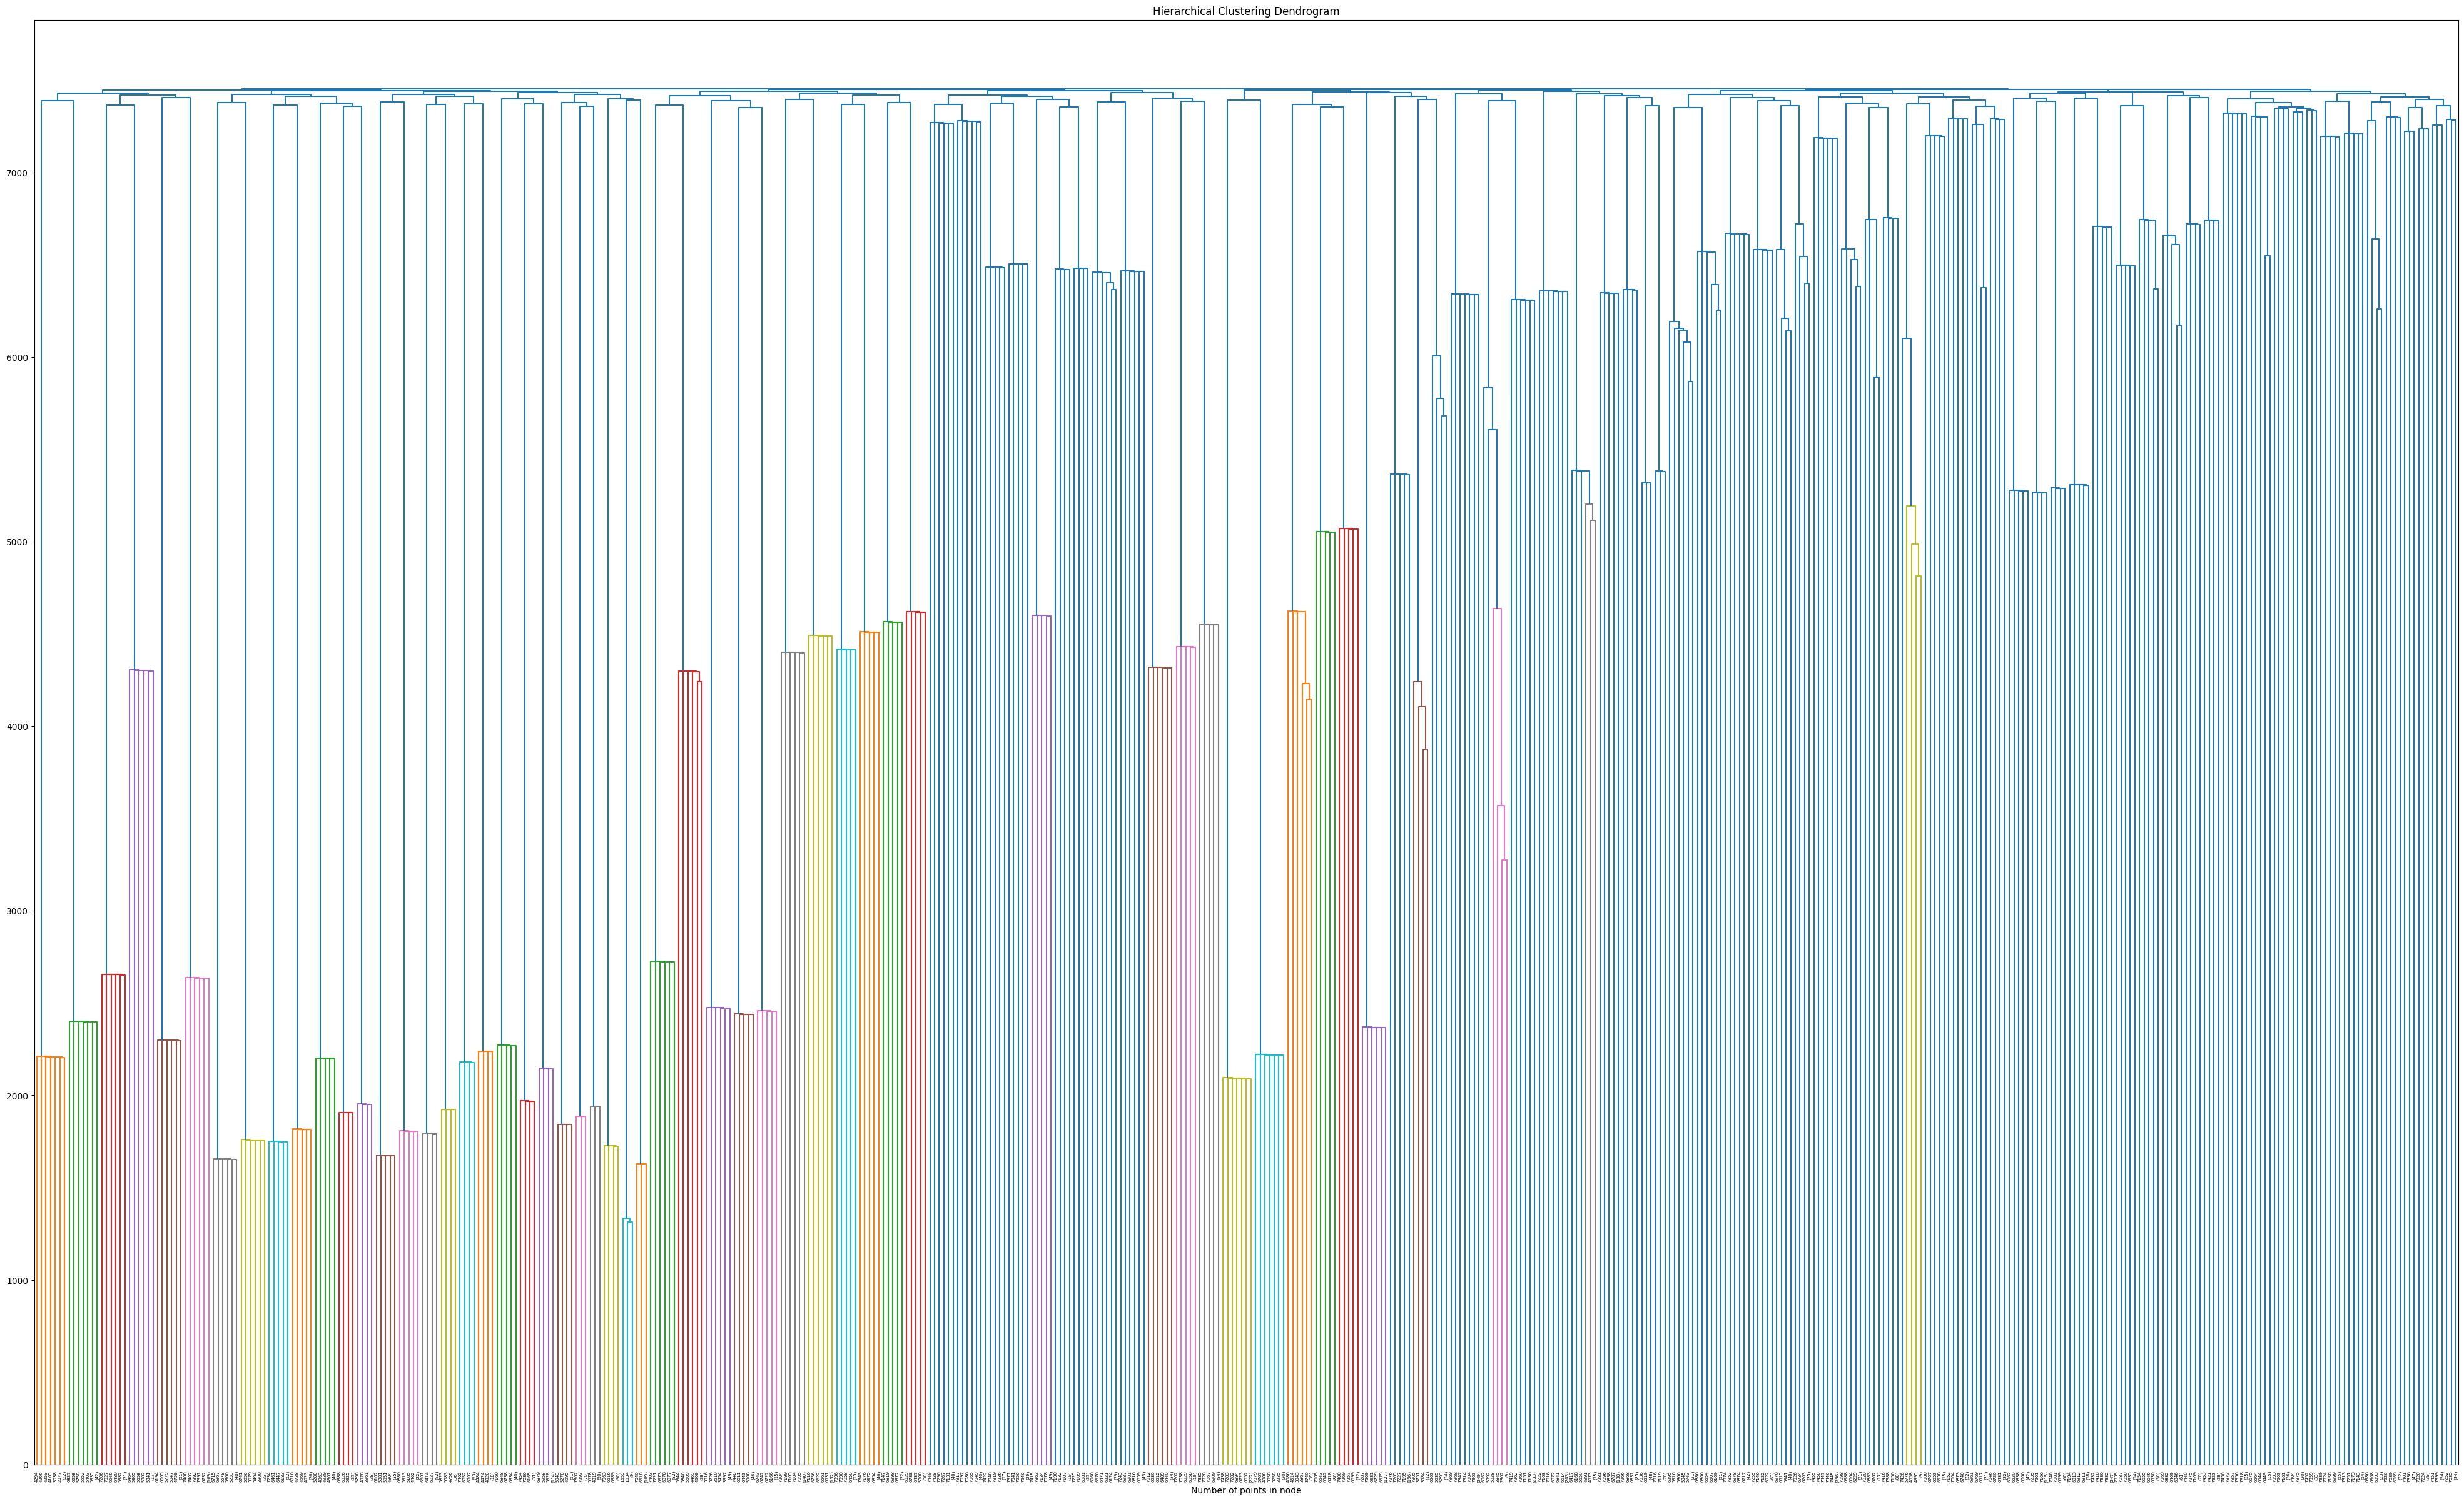

In [75]:
fig = plt.figure(figsize=(50, 30)) #assigning the plot to a variable makes it save correctly
plt.title('Hierarchical Clustering Dendrogram')

# plot the top ten levels of the dendrogram
plot_dendrogram(model, truncate_mode='level', p=10)
plt.xlabel("Number of points in node")
plt.show()
fig.savefig('dendogram.png') #save the figure, giving it a name

As you can see, with 7000 data points, it's pretty difficult to see anything on this dendogram! However, this is just for demonstration purposes, and it's a good way of seeing how the data has been broken up into groups at each stage.

Again, rerun the model, trying out different intial parameters to see how the results change, and try to optimise the performance of the model. Take it in turns to change `distance_threshold` and `n_clusters`.

0.38113278953850555


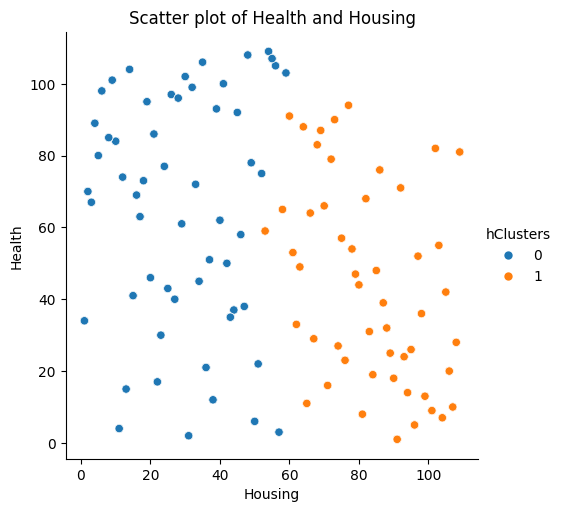

In [80]:
sales_sub = sales[['Housing', 'Health']]
agg = AgglomerativeClustering(distance_threshold=None, n_clusters=2)
agg.fit(sales_sub)
agg_labels = agg.labels_
print(metrics.silhouette_score(sales_sub,agg.labels_)) #specify the data and the labels
sales_sub['hClusters'] = agg_labels
#scatter plot of health and housing deprivation, colour coded by cluster
fig = sns.relplot(data=sales_sub, x='Housing', y='Health', hue='hClusters')
plt.title('Scatter plot of Health and Housing')
plt.show()

<br><br><br>
## Research Questions
As we discussed in the lecture, Vikki is conducting a research project to understand how to make the labs for Data Science for Urban Systems as interesting and informative as possible. If you would like to complete the short research survey, please do so via [this link](https://forms.office.com/r/DTDsEYPF5T). The survey is completely optional, and you are free to contact Vikki to withdraw your answers at any time. But the more responses we get, the better we will be able to run our labs in the future, so please consider taking part! Everyone who responds will be given a packet of sweets as a small 'thank you'. Thanks for your help!


<br><br><br>
## Formative Homework Questions
Now it's your turn to try out adding additional predictors to the models.
You'll need to create K-Means, DBSCAN, and Hierarchical Clustering models and report the results, using the link below.

Remember to visualise and investigate all the individual variables before adding them to your models!
All models should be run on a subset which includes: Price Paid, Housing Deprivation, Environment Deprivation, and Crime Deprivation

__Question 1:__  Using the Elbow method, create a K-Means model with the optimal number of clusters, and calculate the Silhouette Score.  <br>

__Question 2:__  Now create a DBSCAN Model starting with a minimum number of points of 15, and a threshold of 20. This will give you a negative silhouette score. Experiment with changing only the threshold, to find the highest number which gives a positive silhouette score. __Hint:__ You can start by increasing then decreasing the threshold, to see which way the silhouette score moves. <br>

__Question 3:__  Now create a Hierarchical model using the same parameters as used in Question 1. Calculate the Silhouette Score and plot a dendogram. <br>

Once you've completed these exercises, submit your answers [here](https://forms.office.com/r/2SM9TmuRyV).

<br>

In [81]:
sales.head()

,price_paid,deed_date,property_type,new_build,estate_type,city,county,Rank,Income,Employment,...,Housing,Environment,new_build_bin,freehold_bin,type_semi,type_detached,type_flat,type_other,type_terrace,price_high
0,10000,06/05/2021,O,N,L,LONDON,GREATER LONDON,65,56,78,...,4,16,0,0,0,0,0,1,0,0
1,13000,13/05/2021,O,N,F,BRACKNELL,BRACKNELL FOREST,107,108,106,...,14,104,0,1,0,0,0,1,0,0
2,14000,28/05/2021,O,N,F,WORTHING,WEST SUSSEX,92,104,90,...,109,42,0,1,0,0,0,1,0,0
3,15000,21/05/2021,O,N,F,LONDON,GREATER LONDON,65,56,78,...,4,16,0,1,0,0,0,1,0,0
4,15000,25/05/2021,O,N,L,NEWCASTLE UPON TYNE,TYNE AND WEAR,37,35,36,...,51,89,0,0,0,0,0,1,0,0


In [82]:
sales_sub = sales[['price_paid', 'Housing', 'Environment', 'Crime']]

In [83]:
sales_sub.head()

,price_paid,Housing,Environment,Crime
0,10000,4,16,19
1,13000,14,104,107
2,14000,109,42,91
3,15000,4,16,19
4,15000,51,89,65


# Question 1

In [84]:
distortions = [] #create an empty list for our distortion data
K = range(1,10) #the range of K values for the number of clusters we want to try
for k in K: #for each value in K
    kmeanModel = KMeans(n_clusters=k) #build a K-Means clustering model
    kmeanModel.fit(sales_sub) #fit the model to our sales_sub data
    distortions.append(kmeanModel.inertia_) #add the results to our list of distortions

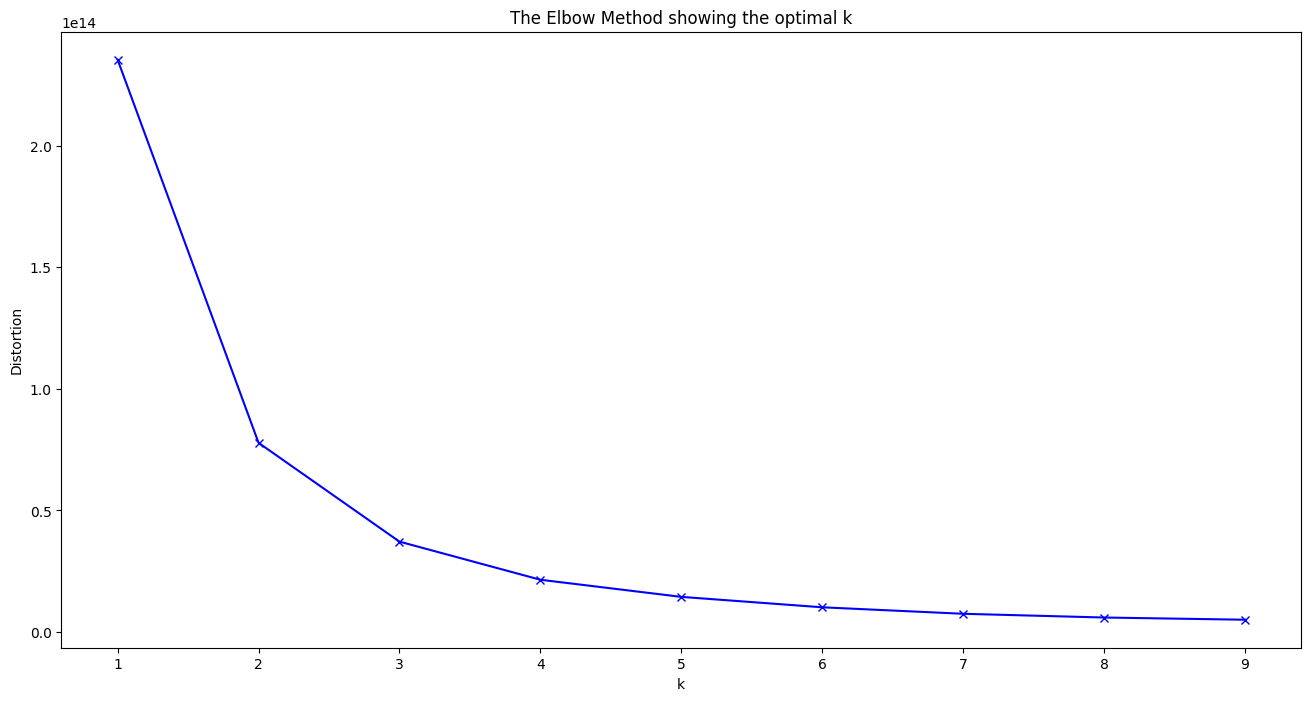

In [85]:
plt.figure(figsize=(16,8))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

There is a big drop between 1 and 3, so we'll use 3 as our number of clusters.

In [98]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(sales_sub)
kmeans_labels = kmeans.labels_
print(metrics.silhouette_score(sales_sub,kmeans.labels_)) #specify the data and the labels

0.5821615893943107


# Question 2

In [96]:
dbscan = DBSCAN(eps=14, min_samples=15)
dbscan.fit(sales_sub)
dbscan_labels = dbscan.labels_
print(metrics.silhouette_score(sales_sub,dbscan.labels_)) #specify the data and the labels

0.2100162740643627


# Question 3

In [99]:
agg = AgglomerativeClustering(distance_threshold=None, n_clusters=3)
agg.fit(sales_sub)
agg_labels = agg.labels_
print(metrics.silhouette_score(sales_sub,agg.labels_)) #specify the data and the labels

0.5252954319807168
